In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import cv2
import tensorflow as tf
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from keras.models import Sequential
#from sklearn.model_selection import train_test_split

In [2]:
X_disp = r"C:\Users\shrir\OneDrive\Desktop\GAN\GAN_PS\dataset\main_matlab\256\new_inputs\disp_200"
X_temp = r"C:\Users\shrir\OneDrive\Desktop\GAN\GAN_PS\dataset\main_matlab\256\new_inputs\temp_200"
Y =r"C:\Users\shrir\OneDrive\Desktop\GAN\GAN_PS\dataset\CIRCULAR_VANE_Images_240220\200_vanes\200_vanes"

In [3]:
X_train = np.zeros((190, 256, 256, 2))
Y_train = np.zeros((190, 256, 256, 1))
X_test = np.zeros((10,256,256,2))
Y_test = np.zeros((10,256,256,1))

In [4]:
for index, (disp_file, temp_file, vane_file) in enumerate(zip(os.listdir(X_disp)[:190], os.listdir(X_temp)[:190], os.listdir(Y)[:190])):
  disp_path = os.path.join(X_disp, disp_file)
  temp_path = os.path.join(X_temp, temp_file)
  vane_path = os.path.join(Y, vane_file)
  disp_img = imread(disp_path)
  temp_img = imread(temp_path)
  vane_img = imread(vane_path)
  disp_img = disp_img/0.5-1
  temp_img = temp_img/0.5-1
  vane_img = np.mean(vane_img, axis=2)
  vane_img = vane_img/127.5-1
  vane_img = np.reshape(vane_img, (256, 256, 1))
  disp_img = np.reshape(disp_img, (256, 256, 1))
  temp_img = np.reshape(temp_img, (256, 256, 1))
  Y_train[index] = vane_img
  X_train[index] = np.concatenate((disp_img, temp_img), axis=2)

In [5]:
for index, (disp_file, temp_file, vane_file) in enumerate(zip(os.listdir(X_disp)[190:200], os.listdir(X_temp)[190:200], os.listdir(Y)[190:200])):
  disp_path = os.path.join(X_disp, disp_file)
  temp_path = os.path.join(X_temp, temp_file)
  vane_path = os.path.join(Y, vane_file)
  disp_img = imread(disp_path)
  temp_img = imread(temp_path)
  vane_img = imread(vane_path)
  disp_img = disp_img/0.5-1
  temp_img = temp_img/0.5-1
  vane_img = np.mean(vane_img, axis=2)
  vane_img = vane_img/127.5-1
  vane_img = np.reshape(vane_img, (256, 256, 1))
  disp_img = np.reshape(disp_img, (256, 256, 1))
  temp_img = np.reshape(temp_img, (256, 256, 1))
  Y_test[index] = vane_img
  X_test[index] = np.concatenate((disp_img, temp_img), axis=2)

In [6]:
X_test.shape

(10, 256, 256, 2)

In [7]:
X_train.shape

(190, 256, 256, 2)

In [8]:
Y_train.shape

(190, 256, 256, 1)

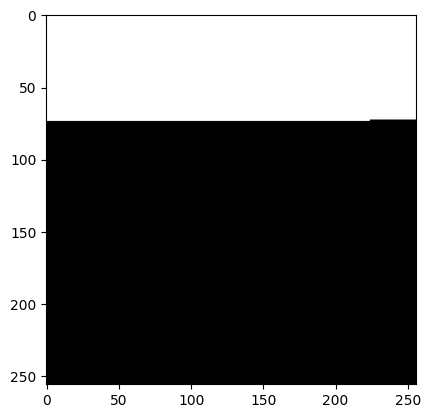

In [9]:
plt.imshow(X_train[5,:,:,0], cmap='gray')

In [10]:
#X_train1, X_test, y_train1, y_test = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

In [11]:
inputs = Input(shape=(256, 256, 2))

#s = tf.keras.layers.Lambda(lambda x:x/255)(inputs)

initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=0.02, seed=42)

c1 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', kernel_initializer=initializer)(inputs)
c1 = tf.keras.layers.BatchNormalization()(c1)
c1 = tf.keras.layers.LeakyReLU(alpha=0.3)(c1)
p1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))(c1)
c2 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', kernel_initializer=initializer)(p1)
c2 = tf.keras.layers.BatchNormalization()(c2)
c2 = tf.keras.layers.LeakyReLU(alpha=0.3)(c2)
p2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))(c2)
c3 = tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', kernel_initializer=initializer)(p2)
c3 = tf.keras.layers.BatchNormalization()(c3)
c3 = tf.keras.layers.LeakyReLU(alpha=0.3)(c3)
p3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))(c3)
c4 = tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', kernel_initializer=initializer)(p3)
c4 = tf.keras.layers.BatchNormalization()(c4)
c4 = tf.keras.layers.LeakyReLU(alpha=0.3)(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))(c4)

c5 = tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', kernel_initializer=initializer)(p4)
c5 = tf.keras.layers.BatchNormalization()(c5)
c5 = tf.keras.layers.LeakyReLU(alpha=0.3)(c5)
p5 = tf.keras.layers.Conv2D(filters=1024,kernel_size= (4, 4), strides=(4, 4), padding='valid')(c5)

u6 = tf.keras.layers.Conv2DTranspose(filters=512, kernel_size=(4, 4), strides=(4, 4), kernel_initializer=initializer)(p5)
u6 = concatenate([u6, c5])
c6 = tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', kernel_initializer=initializer)(u6)
c6 = tf.keras.layers.BatchNormalization()(c6)
c6 = tf.keras.layers.LeakyReLU(alpha=0.3)(c6)
#u7 = tf.keras.layers.Conv2DTranspose(filters=512, kernel_size=(2, 2), strides=(2, 2), kernel_initializer=initializer)(c6)
#c7 = tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', kernel_initializer=initializer)(u7)
#c7 = tf.keras.layers.LeakyReLU(alpha=0.3)(c7)
u8 = tf.keras.layers.Conv2DTranspose(filters=256, kernel_size=(2, 2), strides=(2, 2), kernel_initializer=initializer)(c6)
u8 = concatenate([u8, c4])
c8 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', kernel_initializer=initializer)(u8)
c8 = tf.keras.layers.BatchNormalization()(c8)
c8 = tf.keras.layers.LeakyReLU(alpha=0.3)(c8)
#u4 = tf.keras.layers.concatenate([u4, c2])
#c4 = tf.keras.layers.Conv2D(filters=64, (kernel_size=3, 3), padding='same', kernel_initializer=initializer)(u4)

u9 = tf.keras.layers.Conv2DTranspose(filters=128, kernel_size=(2, 2), strides=(2, 2), kernel_initializer=initializer)(c8)
u9 = concatenate([u9, c3])
c9 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', kernel_initializer=initializer)(u9)
c9 = tf.keras.layers.BatchNormalization()(c9)
c9 = tf.keras.layers.LeakyReLU(alpha=0.3)(c9)
#u5 = tf.keras.layers.concatenate([u5, c1])
#c5 = tf.keras.layers.Conv2D(filters=32, (kernel_size=3, 3), padding='same', kernel_initializer=initializer)(u5)
u10 = tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=(2, 2), strides=(2, 2), kernel_initializer=initializer)(c9)
u10 = concatenate([u10, c2])
c10 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', kernel_initializer=initializer)(u10)
c10 = tf.keras.layers.BatchNormalization()(c10)
c10 = tf.keras.layers.LeakyReLU(alpha=0.3)(c10)
u11 = tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=(2, 2), strides=(2, 2))(c10)
outputs = tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), activation='tanh', padding='same', kernel_initializer=initializer)(u11)

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 2  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 12  2432        ['input_1[0][0]']                
                                8)                                                                
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 12  512        ['conv2d[0][0]']                 
 alization)                     8)                                                            

In [ ]:
model.fit(X_train, Y_train, epochs=200, batch_size=8) 

In [19]:
model.save('iter_5_v2_200epochs.h5')

1/1 [==============================] - 0s 23ms/step


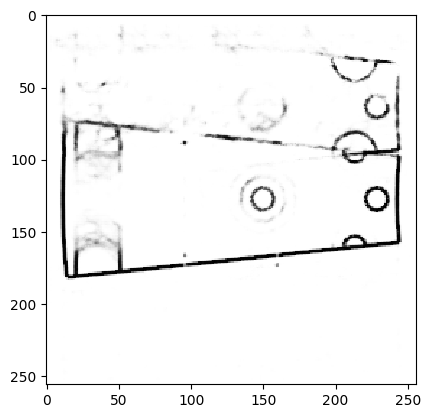

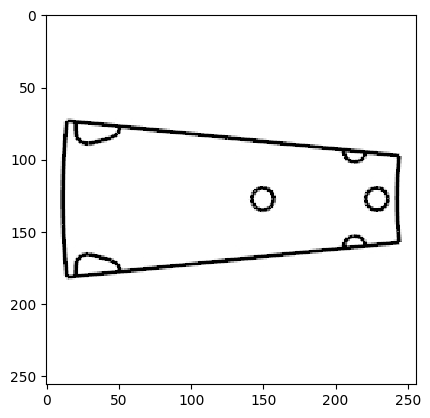

In [20]:
pred = model.predict(X_train[:3])
plt.imshow(pred[0], interpolation='nearest', cmap='gray')
plt.show()
plt.imshow(Y_train[0], interpolation='nearest', cmap='gray')
plt.show()

1/1 [==============================] - 0s 23ms/step


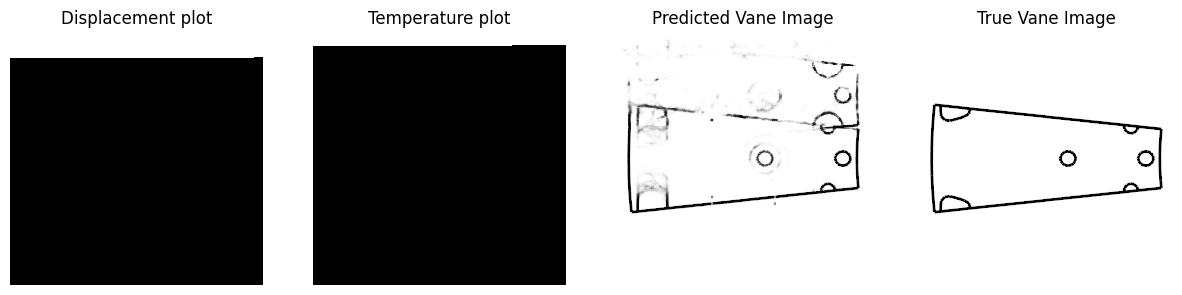

1/1 [==============================] - 0s 18ms/step


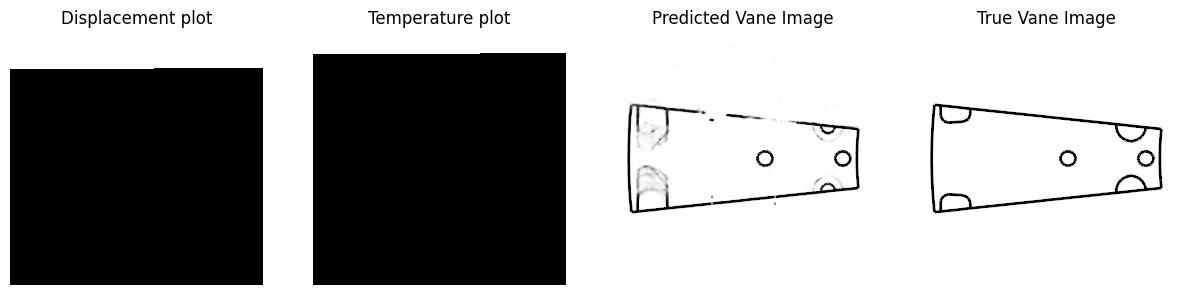

1/1 [==============================] - 0s 22ms/step


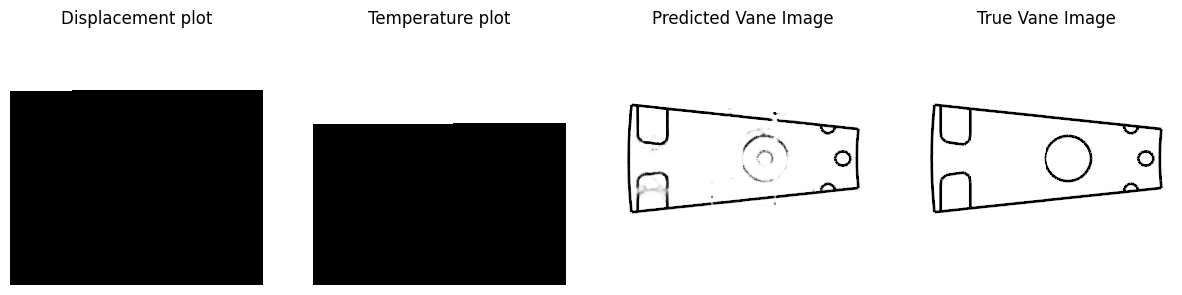

1/1 [==============================] - 0s 19ms/step


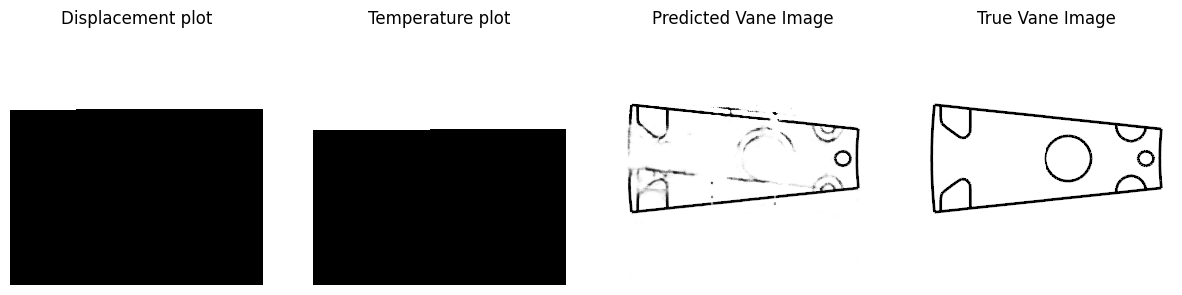

1/1 [==============================] - 0s 19ms/step


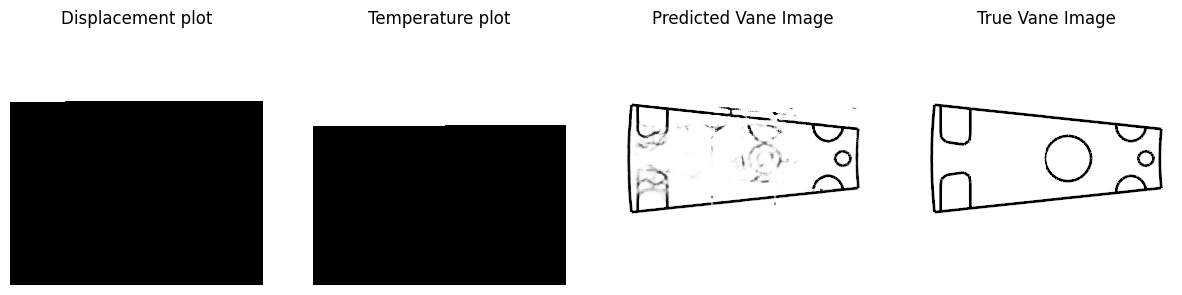

In [21]:
for i in range (5):
    fig = plt.figure(figsize=(15,5))
    plt.subplot(1, 4, 1)
    plt.imshow(X_train[i, :, :, 0], interpolation="nearest", cmap="gray")
    plt.title("Displacement plot")
    plt.axis(False)
    plt.subplot(1, 4, 2)
    plt.imshow(X_train[i, :, :, 1], interpolation="nearest", cmap="gray")
    plt.title("Temperature plot")
    plt.axis(False)
    plt.subplot(1, 4, 3)
    plt.imshow(model.predict(X_train[:5])[i], interpolation="nearest", cmap="gray")
    plt.title("Predicted Vane Image")
    plt.axis(False)
    plt.subplot(1, 4, 4)
    plt.imshow(Y_train[i], interpolation="nearest", cmap="gray")
    plt.title("True Vane Image")
    plt.axis(False)
    plt.show()

1/1 [==============================] - 0s 22ms/step


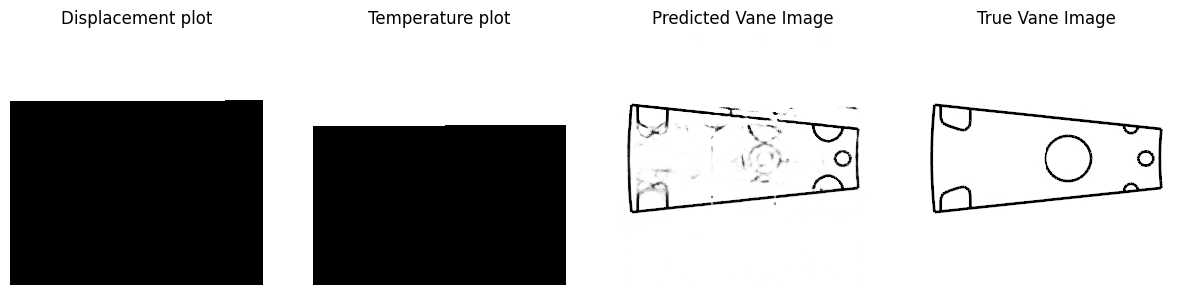

1/1 [==============================] - 0s 19ms/step


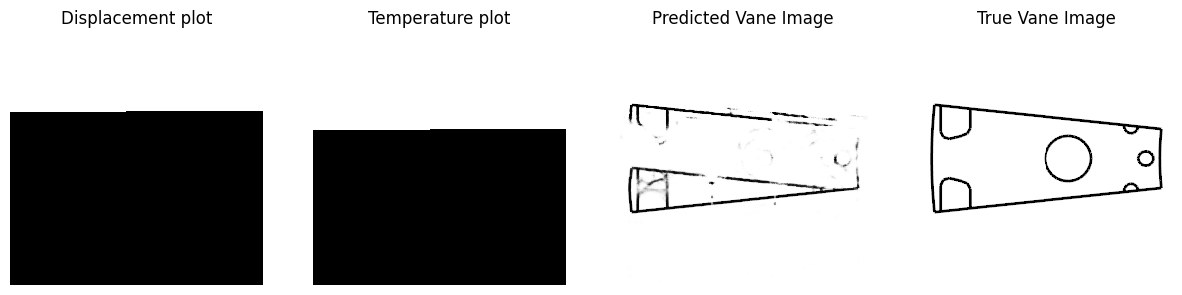

1/1 [==============================] - 0s 22ms/step


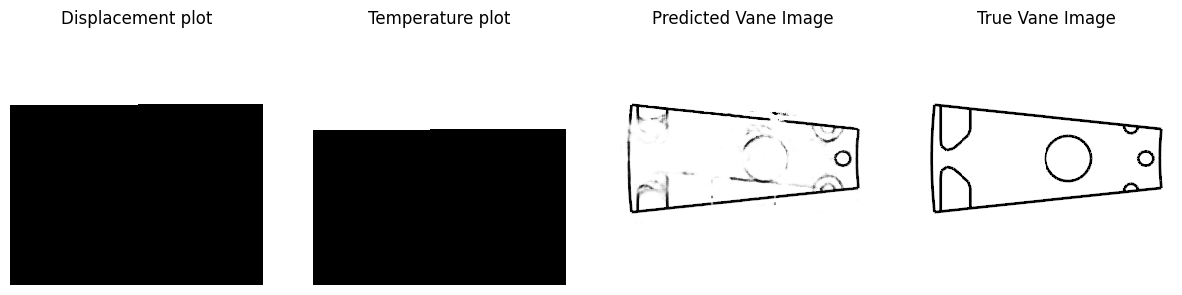

1/1 [==============================] - 0s 19ms/step


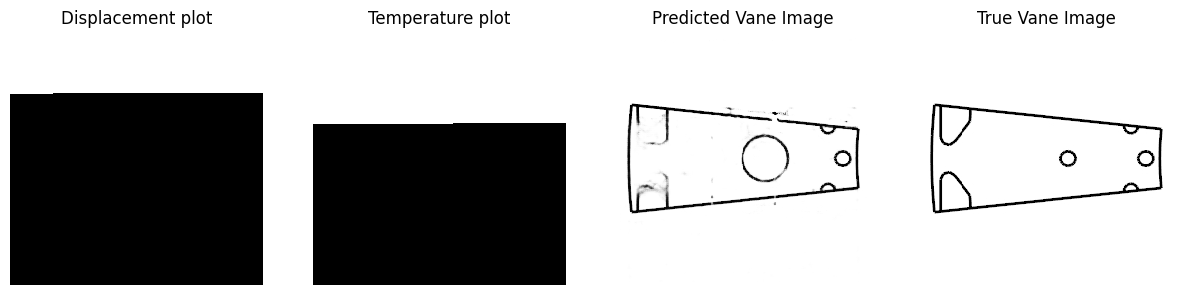

1/1 [==============================] - 0s 21ms/step


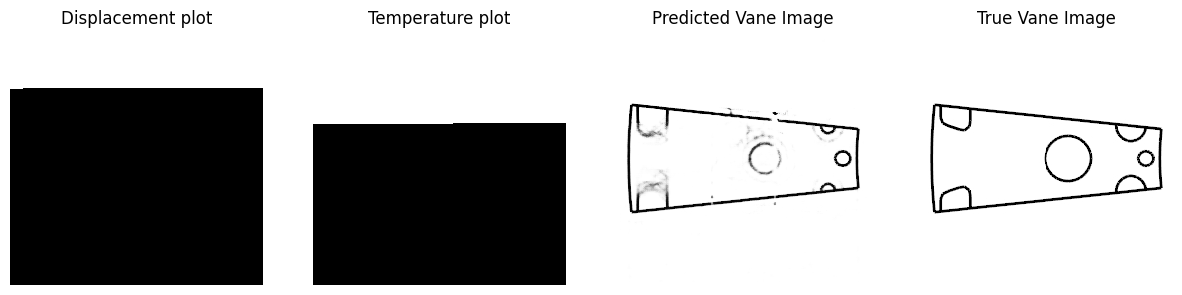

In [22]:
for i in range (5):
    fig = plt.figure(figsize=(15,5))
    plt.subplot(1, 4, 1)
    plt.imshow(X_test[i, :, :, 0], interpolation="nearest", cmap="gray")
    plt.title("Displacement plot")
    plt.axis(False)
    plt.subplot(1, 4, 2)
    plt.imshow(X_test[i, :, :, 1], interpolation="nearest", cmap="gray")
    plt.title("Temperature plot")
    plt.axis(False)
    plt.subplot(1, 4, 3)
    plt.imshow(model.predict(X_test[:5])[i], interpolation="nearest", cmap="gray")
    plt.title("Predicted Vane Image")
    plt.axis(False)
    plt.subplot(1, 4, 4)
    plt.imshow(Y_test[i], interpolation="nearest", cmap="gray")
    plt.title("True Vane Image")
    plt.axis(False)
    plt.show()